#I)Setup

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from keras.callbacks import ModelCheckpoint
print(tf.__version__)

2.11.0


# II) Data Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
X = df.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis = 1)
y = df["Exited"]
print(X.shape, y.shape)
df.head()

(10000, 10) (10000,)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


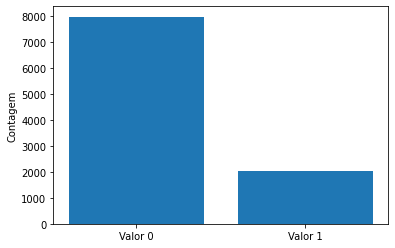

In [ ]:
counts = np.bincount(y)
plt.bar([0, 1], counts)
plt.xticks([0, 1], ['Valor 0', 'Valor 1'])
plt.ylabel('Contagem')
plt.show()

Veja que o nosso conjunto de dados está desbalanceando em relação as classes. Logo, utilizaremos a técnica de Oversampling para balancear o conjunto de dados e garantir que o modelo aprenda com mais precisão as características distintivas da classe minoritária e melhore sua capacidade de generalização.

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(15926, 10) (15926,)


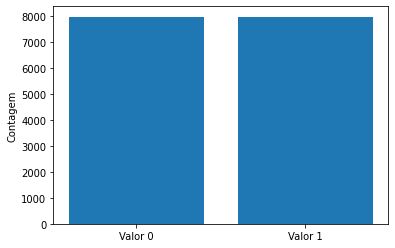

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.000000,1,1,1,101348.880000
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000
2,502,France,Female,42,8,159660.800000,3,1,0,113931.570000
3,699,France,Female,39,1,0.000000,2,0,0,93826.630000
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000
...,...,...,...,...,...,...,...,...,...,...
15921,666,France,Female,46,3,73031.842117,1,0,0,21122.379132
15922,656,Germany,Female,32,4,121902.168505,3,0,0,146434.427308
15923,600,Germany,Female,30,6,141479.693155,1,0,0,72881.057756
15924,657,Spain,Female,41,6,0.000000,2,0,0,167795.704143


In [ ]:
smote_nc = SMOTENC(categorical_features=[1, 2])
X, y = smote_nc.fit_resample(X, y)
print(X.shape, y.shape)
counts = np.bincount(y)
plt.bar([0, 1], counts)
plt.xticks([0, 1], ['Valor 0', 'Valor 1'])
plt.ylabel('Contagem')
plt.show()
X

In [ ]:
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])
X = pd.get_dummies(X, drop_first = True,  columns = ["Geography"])
X.head(3)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0


In [ ]:
numeric_cols = X.select_dtypes(include = ["float", "int"]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#III) Building the Model

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100, activation = "relu", input_shape = (11,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1200      
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


#IV) Training the model

Epoch 1/50
1020/1020 [==============================] - 4s 4ms/step - loss: 0.4559 - accuracy: 0.7895 - val_loss: 0.3949 - val_accuracy: 0.8265
Epoch 2/50
1020/1020 [==============================] - 3s 3ms/step - loss: 0.4250 - accuracy: 0.8093 - val_loss: 0.3878 - val_accuracy: 0.8352
Epoch 3/50
1020/1020 [==============================] - 3s 3ms/step - loss: 0.4107 - accuracy: 0.8164 - val_loss: 0.3769 - val_accuracy: 0.8324
Epoch 4/50
1020/1020 [==============================] - 3s 3ms/step - loss: 0.4028 - accuracy: 0.8181 - val_loss: 0.3765 - val_accuracy: 0.8352
Epoch 5/50
1020/1020 [==============================] - 4s 4ms/step - loss: 0.3996 - accuracy: 0.8213 - val_loss: 0.3745 - val_accuracy: 0.8336
Epoch 6/50
1020/1020 [==============================] - 3s 3ms/step - loss: 0.3982 - accuracy: 0.8205 - val_loss: 0.3705 - val_accuracy: 0.8332
Epoch 7/50
1020/1020 [==============================] - 3s 3ms/step - loss: 0.3966 - accuracy: 0.8244 - val_loss: 0.3768 - val_accuracy:

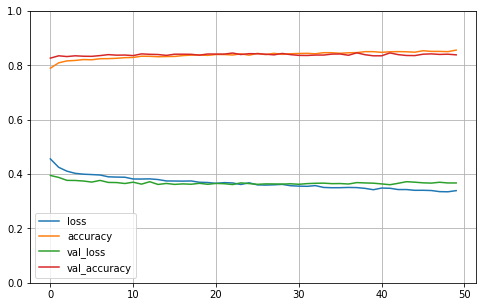

In [ ]:
checkpoint = ModelCheckpoint("weights.hdf5", monitor = "val_loss", save_best_only = True)
callbacks_list = [checkpoint]


history = model.fit(X_train, y_train.to_numpy(), batch_size = 10, validation_split = 0.2,  epochs= 50, callbacks = callbacks_list)



pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#V)Model evaluation and prediction

In [ ]:
model.load_weights("weights.hdf5")
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(test_acc))
y_pred = model.predict(X_test)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

100/100 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8280
Test Accuracy: 0.8279975056648254
100/100 [==============================] - 0s 2ms/step


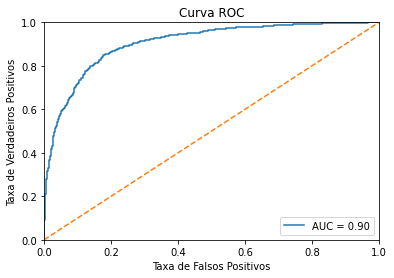

In [ ]:
# Calcular taxas de verdadeiros positivos e falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calcular a área sob a curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred)

# Plotar a curva ROC
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Veja que, como AUC >= 0.9 , temos um excelente modelo de classificação.

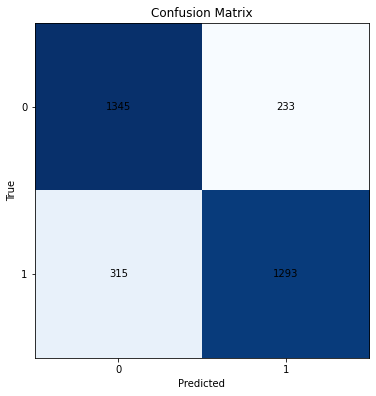

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cmap = plt.cm.Blues
plt.figure(figsize=(6,8))
plt.imshow(cm, interpolation='nearest', cmap=cmap)

plt.xticks(np.arange(2))
plt.yticks(np.arange(2))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Adicionar as contagens de acertos e erros em cada célula da matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

# Exibir o plot
plt.show()

Veja que obtivemos um valor adequado de f1_score, uma vez que, para dado problema, precisamos analisar tanto a precisão quanto a sensibilidade do modelo.

In [ ]:
print(f1_score(y_test, y_pred_class))

0.8251435864709636
